- 다양한 방법으로 모델을 구성
- 다중입력 다중출력
- 여러방식을 혼합


In [1]:
import keras
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
    ])

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

inputs = tf.keras.Input(shape=(28*28,))
x = tf.keras.layers.Dense(64,activation='relu')(inputs)
outputs = tf.keras.layers.Dense(10,activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

다중입력 다중출력

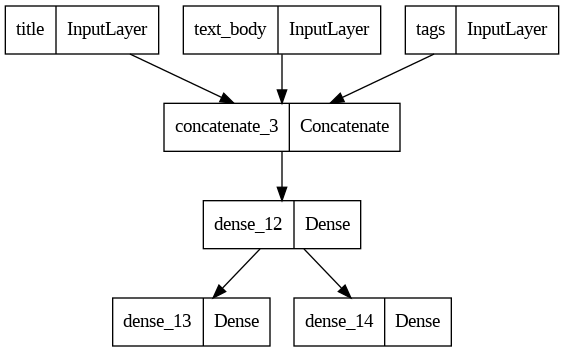

In [5]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = tf.keras.Input(shape=(vocabulary_size,),name = 'title')
text_body = tf.keras.Input(shape=(vocabulary_size,),name = 'text_body')
tag = tf.keras.Input(shape=(num_tags,),name = 'tags')

concat = tf.keras.layers.Concatenate()([title,text_body,tag])
x = tf.keras.layers.Dense(64,activation='relu')(concat)

outputs1 = tf.keras.layers.Dense(1,activation='sigmoid')(x)
outputs2 = tf.keras.layers.Dense(10,activation='softmax')(x)

model = tf.keras.Model(inputs = [title,text_body,tag], outputs=[outputs1,outputs2])
tf.keras.utils.plot_model(model,'abc.png')

In [6]:
model.layers

In [8]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [10]:
model.layers[3], model.layers[3].output

(<keras.layers.merging.concatenate.Concatenate at 0x7fe0346db310>,
 <KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate_3')>)

중간층의 출력을 재사용해서 새로운 모델을 만들기

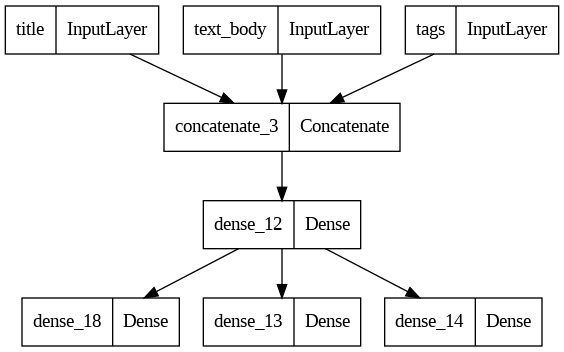

In [15]:
inputs = model.layers[4].output
x = tf.keras.layers.Dense(3,activation='softmax')(inputs)
model = tf.keras.Model(inputs =[title,text_body,tag] , outputs =[x,outputs1,outputs2] )
tf.keras.utils.plot_model(model,'abc.png')

사용자 정의 콜백 만들기

In [34]:
import matplotlib.pyplot as plt
class LossHistory(tf.keras.callbacks.Callback):
  def on_train_begin(self, logs=None):
    self.per_batch_losses = []
    print("train begin")
  def on_train_end(self, logs=None):
    print("train end", self.per_batch_losses)
    self.per_batch_losses = []
  def on_epoch_end(self, epoch, logs=None):
    self.per_batch_losses.append(logs.get('loss'))
    plt.clf()
    # print(f"\ttest : {self.per_batch_losses}")
    plt.plot(range( len(self.per_batch_losses)),self.per_batch_losses, label='Training loss for each batch' )
    plt.xlabel(f"Batch(epoch {epoch})")
    plt.ylabel("Loss")
    plt.legend()
    # plt.savefig(f"plot_at_epoch_{epoch}")


train begin
Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4185 - accuracy: 0.8833 - val_loss: 0.2897 - val_accuracy: 0.9151
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2578 - accuracy: 0.9264 - val_loss: 0.2416 - val_accuracy: 0.9292
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2230 - accuracy: 0.9370 - val_loss: 0.2090 - val_accuracy: 0.9386
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1997 - accuracy: 0.9428 - val_loss: 0.1970 - val_accuracy: 0.9424
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1829 - accuracy: 0.9481 - val_loss: 0.1901 - val_accuracy: 0.9445
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1711 - accuracy: 0.9508 - val_loss: 0.1851 - val_accuracy: 0.9461
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1614 - accuracy: 0.9531 - val_loss: 0.1772 - v

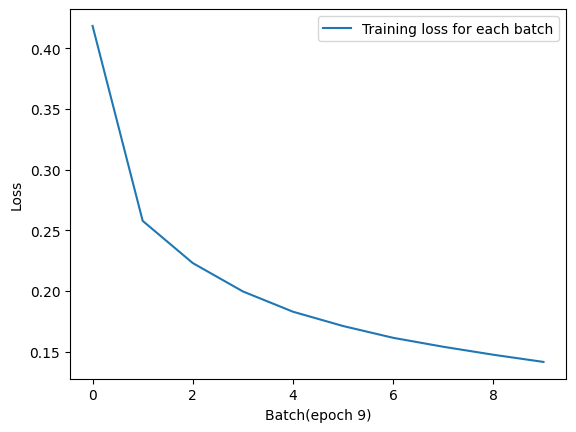

In [35]:
# 데이터  mnist
(train_images,train_labels),(test_images,test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(-1,28*28)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.reshape(-1,28*28)
test_images = test_images.astype('float32') / 255.0
# 모델
dense = tf.keras.layers.Dense

model = tf.keras.Sequential([
    dense(16,activation='relu'),
    dense(10,activation='softmax')
])
# 컴파일
model.compile(optimizer='adam',loss = tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
# 학습 - 적용
model.fit(train_images,train_labels,epochs=10,callbacks=[LossHistory()],validation_data=(test_images,test_labels))